---

<h1><center>SDSE Lab 3 <br><br> K-means clustering </center></h1>

---

In [1]:
result = {
    'group' : '20', # enter your group number here
    'SIDs': ['3036014656','3033625729','3035764926'] # enter the SIDs for the group members
}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats

# 1) Load the data
Use `pickle.load` to load `data2d.pickle`. This file contains a single matrix called `X`. Use variables `N` and `D` for the number of rows (samples) and columns (features) respectively. (2 pts)

In [3]:
with open('data2d.pickle','rb') as file:
    X = pickle.load(file)
    
N = X.shape[0]
D = X.shape[1]
print(D)

2


In [4]:
################################
# Reporting. Do not modify.#####
result['N'] = N
result['D'] = D
################################

# 2) Scatter plot
Create a scatter plot with the first column along the x-axis and the second column along the y-axis. Use `plt.axis('equal')` to force the two axes to have the same scale. This is important for correct visualization of the Euclidean distances between points. Save your figure handle to `fig2`. (2 pts)

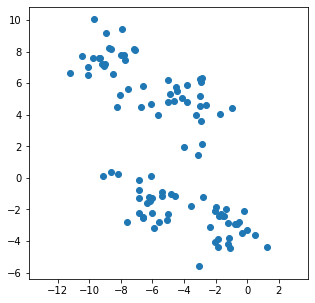

In [5]:
fig2 = plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()
# ADD YOUR CODE HERE

In [6]:
################################
# Reporting. Do not modify.#####
result['fig2'] = fig2
################################

# 3) Initialize centroids
Complete the function below that takes the number of centroids `K` and the data matrix `X` and returns `K` randomly placed centroids. The centroids should be selected according to a uniform distribution that spans a box fitted to the data. The return value should be a numpy array with shape `(K,D)` where `D` is the number of columns in X. Make sure this function  works for for values of `D` other than 2. (6 pts)

In [7]:
def initialize_centroids(K,X):
    D = X.shape[1]
    ans = np.zeros((K,D))
    for i in range(K):
        for j in range(D):
            ans[i,j] = np.random.uniform(low = np.min(X[:,j]), high = np.max(X[:,j]),size=1)
    return ans
    
    # REMOVE THE pass AND ADD YOUR CODE HERE


In [8]:
################################
# Reporting. Do not modify.#####
result['C3'] = initialize_centroids(3,X)
################################

# 4) Compute the assignment for given centroids
Complete the function below that takes the data matrix and centroid locations, and returns an assignment matrix `r`. `r` should be a numpy array with shape `(N,K)`. Each row of `r` should contain `K-1` `False` values and one `True` value in the position corresponding to the centroid that is nearest to that data point (Euclidean distance). (6 pts)

In [9]:
def assign_samples_to_nearest_centroid(X,C):
    N = X.shape[0]
    K = C.shape[0]
    r = np.zeros((N,K)) == True
    dis_array = np.zeros((N,K))
    for i in range(N):
        for j in range(K):
            dis = np.linalg.norm(X[i]-C[j])
            dis_array[i,j] = dis
    #print("dis:", dis_array)
    #print("=========")
    
    for i in range(N):
        for j in range(K):
            if dis_array[i,j] == np.min(dis_array[i,:]):
                r[i,j] = True
            else:
                r[i,j] = False            
    
    # ADD YOUR CODE HERE
    
    return r

In [10]:
################################
# Reporting. Do not modify.#####
result['r4'] = assign_samples_to_nearest_centroid(X,result['C3'])
################################

# 5) Plot data, centroids, assignment
Complete the function below that takes the data matrix, a set of centroids, and an assignment matrix and creates a scatter plot similar to the one shown here. The centroids should be indicated with a large dot, and the data samples should be color-coded according to their cluster membership. Your plot may not be identical to this one due to the random placement of the centroids. (6 pts)

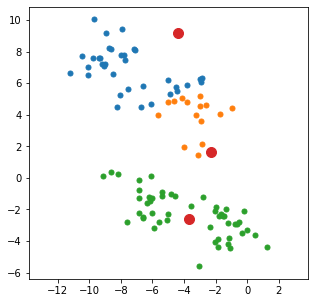

In [11]:
def plot_scatter(X, C, r):
    K = r.shape[1]
    fig = plt.figure(figsize=(5,5))
    
    
    plt.scatter(C[:,0],C[:,1], color = 'r', s = 100)

    for i in range(K):
        d = X[r[:,i],:]
        plt.scatter(d[:,0],d[:,1])
            
    return fig

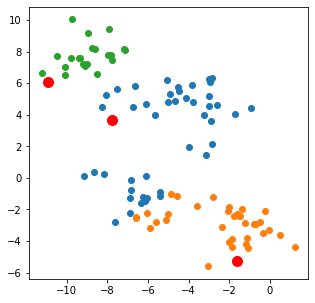

In [12]:
################################
# Reporting. Do not modify.#####
result['fig5'] = plot_scatter(X, result['C3'], result['r4'])
################################

# 6) Compute the centroids for a given assignment
Complete the function below that takes the assignment and the data matrix and returns centroids placed at the mean of each cluster. The return value should be a numpy array with shape `(K,D)`. (6 pts)

In [13]:
def place_centroids(r, X):
    K = r.shape[1]
    D = X.shape[1]
    C = np.empty((K,D))
    
    for i in range(K):
        cluster = X[r[:,i],:]
        centroid_new = np.mean(cluster, axis=0)
        C[i] = centroid_new    
    
    return C

In [14]:
################################
# Reporting. Do not modify.#####
result['C6'] = place_centroids(result['r4'], X)
################################

# 7) Code simple k-means
Now we will use some of the functions we've developed to code the full k-means algorithm. 

Most of the algorithm is done for you in terms of the functions you've already written. Your task is only to implement the stopping criterion, which is to stop as soon as the assignment `r` does not change from one iteration to the next (4 pts).

In [15]:
def run_kmeans(X,C):

    done = False
    first = True
    
    while not done:

        r = assign_samples_to_nearest_centroid(X,C)
        C = place_centroids(r, X)
        
        if np.isnan(np.sum(C)):
            C = initialize_centroids(r.shape[1],X) 
        
        if first  == False: # REPLACE THE True WITH THE CORRECT STOPPING CRITERION
            if np.all(r == rold):
                break    
        rold = r
        first = False

    return C, r

In [16]:
################################
# Reporting. Do not modify.#####
result['kmeans7'] = run_kmeans(X,result['C3'])
################################

# 8) Evaluate the cost function 
Complete the function below that evaluates the intertia for a given data matrix, centroid placement, and assignment matrix. The result is a scalar value. (6 pts)

In [17]:
def eval_cost(X,C,r):
    K = r.shape[1]
    
    centroid = np.zeros(X.shape)

    cost = 0
    for i in range(K):
        distance = np.linalg.norm(X[r[:,i],:] - C[i,:])**2
        cost = cost + distance
    return cost

In [18]:
################################
# Reporting. Do not modify.#####
result['cost8'] = eval_cost(X,result['C3'],result['r4'])
################################

In [19]:
print(result['cost8'])

1465.1566140823195


# 9) Ensemble run
Complete the function below that runs kmeans `ensemblesize` times, each with a different initial centroid placement. These initial placements should be chosen with `initialize_centroids(K,X)`. The function should return the single run with the lowest cost. Results should be returned in a **dictionary** with keys `('C','r','cost')`. `C` are the best centroids, `r` is the best assignment, and `cost` is the corresponding cost. (6 pts)

In [20]:
def ensemble_run(K,X,ensemblesize):
    best_run = {'C':None,'r':None,'cost':None}
    first = True
    for e in range(ensemblesize):
        C = initialize_centroids(K,X)
        C, r = run_kmeans(X,C)
        cost = eval_cost(X,C,r)
       
        if first:
            best_run['C'] = C
            best_run['r'] = r
            best_run['cost'] = cost
        else:
            if cost < best_run['cost']:
                best_run['C'] = C
                best_run['r'] = r
                best_run['cost'] = cost
        first = False
    
    return best_run

In [21]:
################################
# Reporting. Do not modify.#####
result['ens9'] = ensemble_run(3,X,100)
################################

/Users/HKBergstrom/opt/anaconda3/envs/sdse/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/HKBergstrom/opt/anaconda3/envs/sdse/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [22]:
print(result['ens9']['cost'])

616.5673133446328


# 10) Iteration over K
Complete the function below that takes the data matrix, a sample size, and a maximum number of clusters to consider (`maxK`).  The function should run `ensemble_run` for all values of `K` from 1 to `maxK`. It should return a numpy array of length `maxK-1` with the best case cost for each value of `K`. (6 pts)

In [23]:
def K_iteration(X, ensemblesize, maxK=10):
    allK = list(range(1,maxK+1))
    best_cost = np.empty(len(allK))
    
    for k in allK:
        best_cost[k-1] = ensemble_run(k,X,ensemblesize)['cost']
    
    
    return best_cost

# 11) Selecting K

We now run `K_iteration` with `ensemblesize=200`, `maxK=10` and plot the result. The plot shows the percent improvement of each `K` over `K-1`. From this plot, choose an ideal value for `K` and report it in the results dictionary as `Kideal`. (4 pts)

In [24]:
ensemblesize = 200
maxK=10
best_cost = K_iteration(X, ensemblesize, maxK)


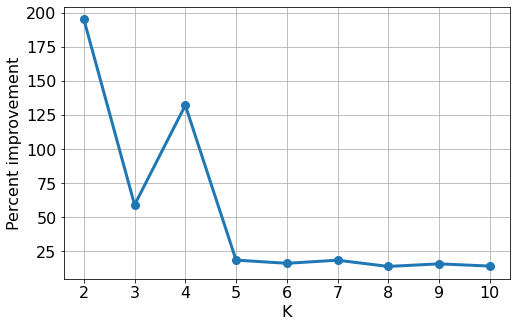

In [25]:
fig11 = plt.figure(figsize=(8,5));
allK = list(range(1,maxK+1));
plt.plot(allK[1:],100*np.abs(np.diff(best_cost)) / best_cost[1:],
         linewidth=3,
         marker='o',
         markersize=8)
plt.grid();
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('K', size = '16');
plt.ylabel('Percent improvement', size = '16');
plt.show;

In [26]:
# REPLACE THE None WITH YOUR Kideal VALUE.

Kideal = '5'

In [27]:
################################
# Reporting. Do not modify.#####
result['fig11'] = fig11
result['Kideal'] = Kideal
################################

---
## Do not modify below this

In [28]:
with open('{}.pickle'.format(result['group']),'wb') as file:
    pickle.dump(result,file)